Option B – Win Rate Driver Analysis
Identify which factors are hurting or improving win rate.

For further analysis and model i choose Option B based on my eda 

**Problem statement**

the goal is to understand what factors are driving deal wins and losses and to flag early risk signals that indicate when a deal is likely to fail .
instead of predicting blindly, this appproach helps sales leader see where and why deals break down , so our team can take actions earlier .


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv("skygeni_sales_data.csv")

In [9]:
df["is_won"] = df["outcome"].apply(lambda x: 1 if x == "Won" else 0)

**Win rate by Sales Cycle Buckets**

In [4]:
df["sales_cycle_bucket"] = pd.cut(df["sales_cycle_days"], bins=[0, 30, 60, 90, 999], labels=["Short", "Medium", "Long", "Very Long"])

In [5]:
cycle_win_rates = df.groupby("sales_cycle_bucket")["is_won"].mean().reset_index()
cycle_win_rates

C:\Users\anjan\AppData\Local\Temp\ipykernel_19676\1164547371.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cycle_win_rates = df.groupby("sales_cycle_bucket")["is_won"].mean().reset_index()


,sales_cycle_bucket,is_won
0,Short,0.490768
1,Medium,0.431732
2,Long,0.453532
3,Very Long,0.442586


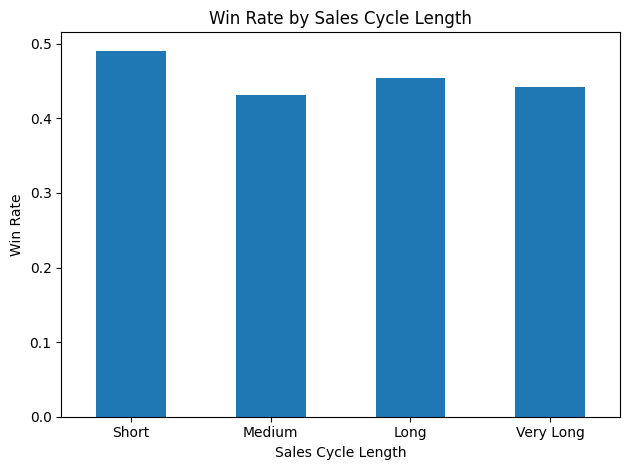

In [13]:
cycle_win_rates.plot(x="sales_cycle_bucket", y="is_won", kind="bar", legend=False)
plt.title("Win Rate by Sales Cycle Length")
plt.xlabel("Sales Cycle Length")
plt.ylabel("Win Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Win rate by Deal Stage**

In [7]:
stage_total = (df.groupby('deal_stage')["is_won"].mean().reset_index(name='win_rate').sort_values(by='win_rate', ascending=True))
stage_total


,deal_stage,win_rate
4,Qualified,0.422594
3,Proposal,0.446977
1,Demo,0.458293
2,Negotiation,0.466332
0,Closed,0.467402


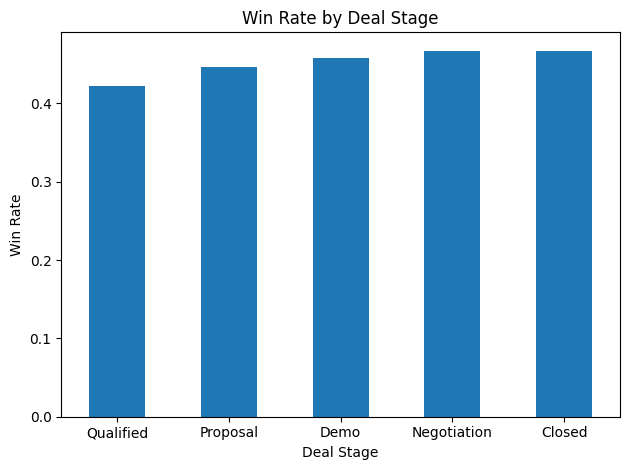

In [15]:
stage_total.plot(x="deal_stage", y="win_rate", kind="bar", legend=False)
plt.title("Win Rate by Deal Stage")
plt.xlabel("Deal Stage")
plt.ylabel("Win Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Win rate by Lead Source**

In [16]:
lead_source_win_rates = df.groupby("lead_source")["is_won"].mean().reset_index().sort_values(by="is_won", ascending=False)
lead_source_win_rates

,lead_source,is_won
0,Inbound,0.460380
3,Referral,0.455272
1,Outbound,0.455056
2,Partner,0.439516


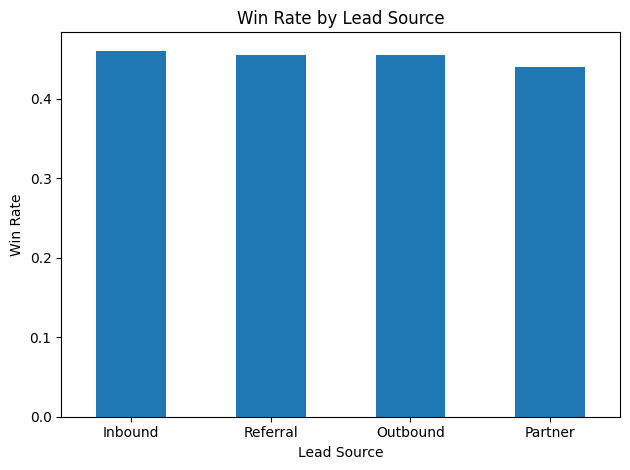

In [18]:
lead_source_win_rates.plot(x="lead_source", y="is_won", kind="bar", legend=False)
plt.title("Win Rate by Lead Source")
plt.xlabel("Lead Source")
plt.ylabel("Win Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Win rate by Region**

In [19]:
region_win_rates = df.groupby("region")["is_won"].mean().reset_index().sort_values(by="is_won", ascending=False)
region_win_rates

,region,is_won
2,India,0.457232
1,Europe,0.455799
0,APAC,0.449275
3,North America,0.447942


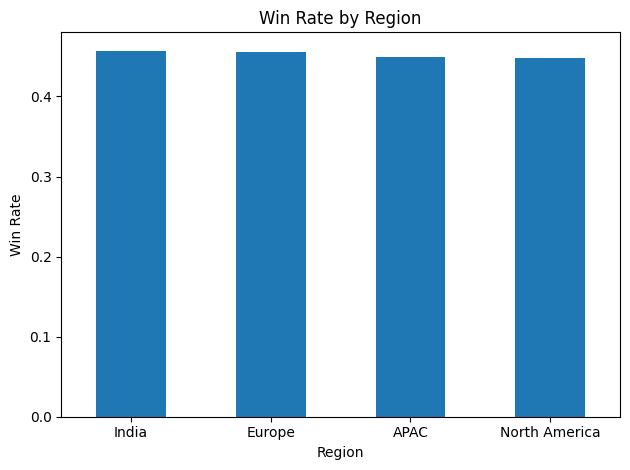

In [20]:
region_win_rates.plot(x="region", y="is_won", kind="bar", legend=False)
plt.title("Win Rate by Region")
plt.xlabel("Region")
plt.ylabel("Win Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Win rate by Sales Rep**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   deal_id             5000 non-null   object  
 1   created_date        5000 non-null   object  
 2   closed_date         5000 non-null   object  
 3   sales_rep_id        5000 non-null   object  
 4   industry            5000 non-null   object  
 5   region              5000 non-null   object  
 6   product_type        5000 non-null   object  
 7   lead_source         5000 non-null   object  
 8   deal_stage          5000 non-null   object  
 9   deal_amount         5000 non-null   int64   
 10  sales_cycle_days    5000 non-null   int64   
 11  outcome             5000 non-null   object  
 12  is_won              5000 non-null   int64   
 13  sales_cycle_bucket  5000 non-null   category
dtypes: category(1), int64(3), object(10)
memory usage: 513.0+ KB


In [23]:
rep_win_rates = df.groupby("sales_rep_id")["is_won"].mean().reset_index().sort_values(by="is_won", ascending=False)
rep_win_rates

,sales_rep_id,is_won
13,rep_21,0.509615
3,rep_12,0.483333
23,rep_8,0.481283
10,rep_19,0.479592
18,rep_3,0.472222
7,rep_16,0.470852
12,rep_20,0.469565
2,rep_11,0.465000
11,rep_2,0.461538
19,rep_4,0.458128


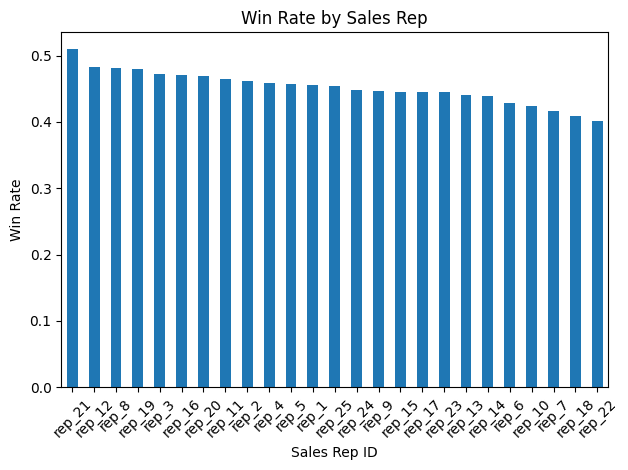

**Risk Signals (Rule-Based)**

In [26]:
avg_cycle = df['sales_cycle_days'].mean()
print(avg_cycle)


63.7518


In [32]:
df['risk_long_cycle'] = df['sales_cycle_days'] > avg_cycle

low_win_sources = lead_source_win_rates[
    lead_source_win_rates['is_won'] < lead_source_win_rates['is_won'].mean()]['lead_source']

df['risk_lead_source'] = df['lead_source'].isin(low_win_sources)

low_win_regions = region_win_rates[region_win_rates['is_won'] < region_win_rates['is_won'].mean()]['region']

df['risk_region'] = df['region'].isin(low_win_regions)


In [ ]:
df['risk_score'] = (
    df['risk_long_cycle'].astype(int) +
    df['risk_lead_source'].astype(int) +
    df['risk_region'].astype(int))


In [31]:
df['risk_score'].value_counts().sort_index()

risk_score
0     913
1    2234
2    1549
3     304
Name: count, dtype: int64

In [33]:
def map_risk_level(score):
    if score == 0:
        return 'Low Risk'
    elif score in [1, 2]:
        return 'Medium Risk'
    else:
        return 'High Risk'

df['risk_level'] = df['risk_score'].apply(map_risk_level)


In [34]:
df['risk_level'].value_counts()

risk_level
Medium Risk    3783
Low Risk        913
High Risk       304
Name: count, dtype: int64

i used the above code to create a risk score based on sales cycle length, lead source, and region. 
Each factor contributes to the overall risk score, which is then categorized into low, medium, and high risk levels. 
The distribution of these risk levels can help identify which deals may require more attention or resources to increase the chances of winning.

**Function: Risk Scoring Engine**

This function:


Computes win-rate–based risk signals

Creates risk_score

Maps it to risk_level

In [35]:
def build_deal_risk_engine(df):
    df = df.copy()

    df['is_won'] = df['outcome'].apply(lambda x: 1 if x == 'Won' else 0)

    avg_cycle = df['sales_cycle_days'].mean()

    lead_win_rate = df.groupby('lead_source')['is_won'].mean()
    low_win_sources = lead_win_rate[lead_win_rate < lead_win_rate.mean()].index

    region_win_rate = df.groupby('region')['is_won'].mean()
    low_win_regions = region_win_rate[region_win_rate < region_win_rate.mean()].index

    df['risk_long_cycle'] = df['sales_cycle_days'] > avg_cycle
    df['risk_lead_source'] = df['lead_source'].isin(low_win_sources)
    df['risk_region'] = df['region'].isin(low_win_regions)

    df['risk_score'] = (
        df['risk_long_cycle'].astype(int) +
        df['risk_lead_source'].astype(int) +
        df['risk_region'].astype(int)
    )

    def map_risk(score):
        if score == 0:
            return 'Low Risk'
        elif score in [1, 2]:
            return 'Medium Risk'
        else:
            return 'High Risk'

    df['risk_level'] = df['risk_score'].apply(map_risk)

    return df


In [36]:
df_scored = build_deal_risk_engine(df)

Open deals = not yet Won or still active

In [37]:
open_deals = df_scored[df_scored['outcome'] != 'Won']
open_deals['risk_level'].value_counts()

risk_level
Medium Risk    2033
Low Risk        513
High Risk       191
Name: count, dtype: int64

In [38]:
top_10_risky_deals = (
    open_deals
    .sort_values(['risk_score', 'sales_cycle_days'], ascending=False)
    .head(10)
    [['deal_id',
      'sales_rep_id',
      'region',
      'lead_source',
      'deal_stage',
      'sales_cycle_days',
      'deal_amount',
      'risk_score',
      'risk_level']]
)

top_10_risky_deals


,deal_id,sales_rep_id,region,lead_source,deal_stage,sales_cycle_days,deal_amount,risk_score,risk_level
3456,D03457,rep_24,North America,Partner,Qualified,120,4130,3,High Risk
4347,D04348,rep_5,APAC,Partner,Negotiation,120,12027,3,High Risk
4878,D04879,rep_5,APAC,Partner,Demo,120,96732,3,High Risk
4987,D04988,rep_5,North America,Partner,Demo,120,8238,3,High Risk
931,D00932,rep_2,North America,Partner,Negotiation,119,4518,3,High Risk
1948,D01949,rep_15,North America,Partner,Demo,119,6208,3,High Risk
4140,D04141,rep_5,APAC,Partner,Qualified,119,3397,3,High Risk
1209,D01210,rep_21,APAC,Partner,Qualified,118,19494,3,High Risk
2064,D02065,rep_9,North America,Partner,Closed,118,21629,3,High Risk
2724,D02725,rep_12,North America,Partner,Proposal,118,9654,3,High Risk


**conclusion** :

the above function looks at past sales data to figure out which deals are risky and which ones look safe. 
First, it converts the deal outcome into a simple win or loss signal and calculates the average time it usually takes to close a deal. 
This average sales cycle becomes a benchmark to judge whether a deal is moving normally or taking too long.

Next, it checks how well different lead sources and regions perform by comparing their win rates. 
Lead sources and regions with lower-than-average win rates are marked as risky. 
Each deal is then checked for three warning signs: is the deal taking longer than usual, is it coming from a low-performing lead source, and is it from a weaker region.

Finally, the function combines these warning signs into a single risk score. Deals with no warning signs are labeled as Low Risk, deals with one or two signs are Medium Risk, and deals with all warning signs are marked as High Risk. 
This makes it easy for sales leaders to quickly spot which open deals need immediate attention.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   deal_id             5000 non-null   object  
 1   created_date        5000 non-null   object  
 2   closed_date         5000 non-null   object  
 3   sales_rep_id        5000 non-null   object  
 4   industry            5000 non-null   object  
 5   region              5000 non-null   object  
 6   product_type        5000 non-null   object  
 7   lead_source         5000 non-null   object  
 8   deal_stage          5000 non-null   object  
 9   deal_amount         5000 non-null   int64   
 10  sales_cycle_days    5000 non-null   int64   
 11  outcome             5000 non-null   object  
 12  is_won              5000 non-null   int64   
 13  sales_cycle_bucket  5000 non-null   category
 14  risk_long_cycle     5000 non-null   bool    
 15  risk_lead_source    5000 non-null   bo

In [41]:
df.to_csv("skygeni_sales_data_with_risk.csv", index=False)